In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

harris_p1 = pd.read_csv('data/Option 1/HarrisPartI.csv')
harris_p2 = pd.read_csv('data/Option 1/HarrisPartII.csv')
harris_p3 = pd.read_csv('data/Option 1/HarrisPartIII.csv')
vandenberg = pd.read_csv('data/Option 1/vandenBerg_table2.csv')
krause = pd.read_csv('data/Option 1/Krause21.csv')

## Distance from Galactic Centre vs. Number of GCs

Clusters with r_gc > 20 kpc:
NGC 5634: 21.20 kpc
NGC 4147: 21.40 kpc
Arp 2: 21.40 kpc
NGC 7492: 25.30 kpc
NGC 5824: 25.90 kpc
Pal 13: 26.90 kpc
AM 4: 27.80 kpc
NGC 5694: 29.40 kpc
NGC 6229: 29.80 kpc
Whiting 1: 34.50 kpc
Pal 2: 35.00 kpc
Pal 15: 38.40 kpc
NGC 7006: 38.50 kpc
Pyxis: 41.40 kpc
Ko 2: 41.90 kpc
Ko 1: 49.30 kpc
Pal 14: 71.60 kpc
NGC 2419: 89.90 kpc
Eridanus: 95.00 kpc
Pal 3: 95.70 kpc
Pal 4: 111.20 kpc
AM 1: 124.60 kpc


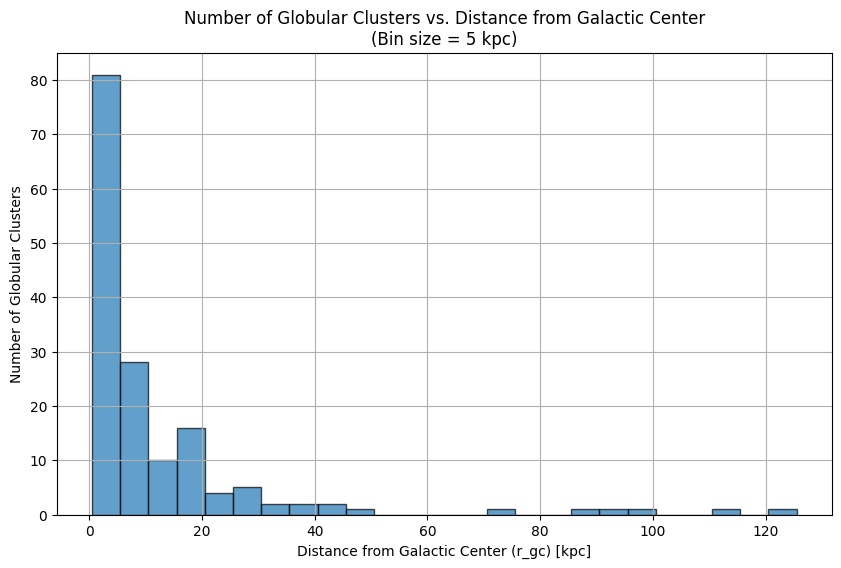

Clusters with r_gc > 20 kpc:
NGC 5634: 21.20 kpc
NGC 4147: 21.40 kpc
Arp 2: 21.40 kpc
NGC 7492: 25.30 kpc
NGC 5824: 25.90 kpc
Pal 13: 26.90 kpc
AM 4: 27.80 kpc
NGC 5694: 29.40 kpc
NGC 6229: 29.80 kpc
Whiting 1: 34.50 kpc
Pal 2: 35.00 kpc
Pal 15: 38.40 kpc
NGC 7006: 38.50 kpc
Pyxis: 41.40 kpc
Ko 2: 41.90 kpc
Ko 1: 49.30 kpc
Pal 14: 71.60 kpc
NGC 2419: 89.90 kpc
Eridanus: 95.00 kpc
Pal 3: 95.70 kpc
Pal 4: 111.20 kpc
AM 1: 124.60 kpc


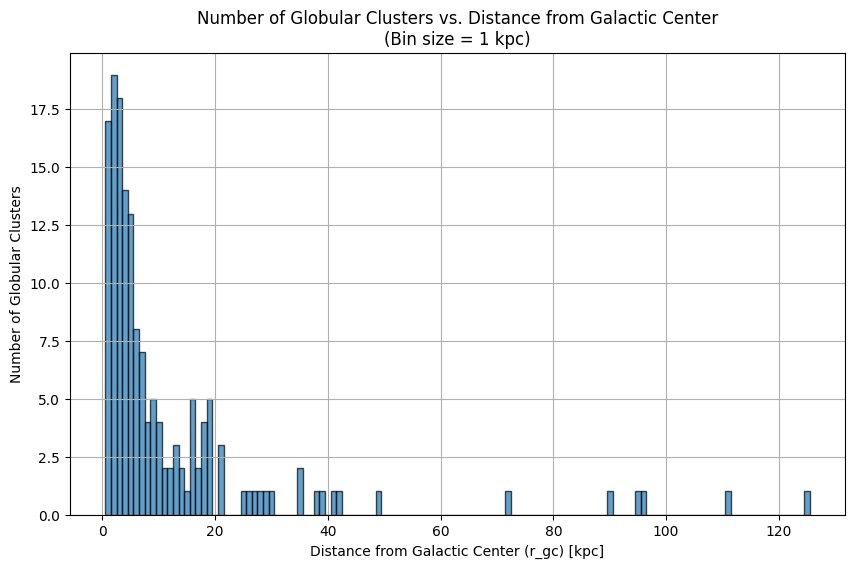

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters_vs_distance(harris_file, bin_size=5, thresh_dist=40):
    """
    Plots the number of globular clusters per bin vs. their distance from the Galactic center (r_gc)
    and displays the names of clusters located at a distance > thresh_dist kpc.
    
    Args:
    - harris_file: Path to the Harris CSV file (Part I) containing r_gc and cluster name data.
    - bin_size: Size of the bins for grouping clusters by distance.
    """
    # Load the CSV file (assuming 'r_gc' and 'Cluster Name' are columns in the dataset)
    harris_data = pd.read_csv(harris_file)
    
    # Extract r_gc (distance from Galactic center) and cluster names
    r_gc = harris_data['R_gc'].dropna().astype(float)
    # cluster_names = harris_data['ID']
    
    # Display the names of clusters located at a distance > thresh_dist kpc
    distant_clusters = harris_data[r_gc > thresh_dist]
    # distant_clusters['R_gc'] = pd.to_numeric(distant_clusters['R_gc'], errors='coerce')
    distant_clusters.sort_values(by=['R_gc'])
    # print(distant_clusters)
    if not distant_clusters.empty:
        print(f"Clusters with r_gc > {thresh_dist} kpc:")
        cds = sorted(list(zip(distant_clusters['ID'], distant_clusters['R_gc'])), key=lambda x: x[1])
        
        for name, distance in cds:
            print(f"{name}: {distance:.2f} kpc")
    else:
        print(f"No clusters found with r_gc > {thresh_dist} kpc.")
    
    # Define the bin edges based on the min and max r_gc values and the bin size
    bin_edges = np.arange(r_gc.min(), r_gc.max() + bin_size, bin_size)
    
    # Calculate the histogram (number of clusters per bin)
    counts, bin_edges = np.histogram(r_gc, bins=bin_edges)
    
    # Calculate bin centers for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Plot the number of clusters vs. distance from Galactic center
    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, counts, width=bin_size, edgecolor='black', alpha=0.7)
    plt.xlabel("Distance from Galactic Center (r_gc) [kpc]")
    plt.ylabel("Number of Globular Clusters")
    plt.title(f"Number of Globular Clusters vs. Distance from Galactic Center\n(Bin size = {bin_size} kpc)")
    plt.grid(True)
    plt.show()


plot_clusters_vs_distance("data/Option 1/HarrisPartI.csv", bin_size=5, thresh_dist=20)
plot_clusters_vs_distance("data/Option 1/HarrisPartI.csv", bin_size=1, thresh_dist=20)
